In [18]:
import cv2
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from skimage.feature import greycomatrix,greycoprops

In [69]:
img = cv2.imread('./test_chun1.jpeg',-1)
img2 = cv2.imread('./test_chun2.jpeg',-1)
img3 = cv2.imread('./test_jin.jpg',0)
scaler = MinMaxScaler()

In [70]:
hist = cv2.calcHist([img],[0],None,[256],[0,256])
hist2 = cv2.calcHist([img2],[0],None,[256],[0,256])
hist3 = cv2.calcHist([img3],[0],None,[256],[0,256])
hist = cv2.normalize(hist,hist).flatten()
hist2 = cv2.normalize(hist2,hist2).flatten()
hist3 = cv2.normalize(hist3,hist3).flatten()

In [71]:
x = cv2.compareHist(hist,hist2,cv2.HISTCMP_INTERSECT)
x

12.30379649349561

In [72]:
x2 = cv2.compareHist(hist,hist3,cv2.HISTCMP_INTERSECT)
x2

8.434235603457637

In [24]:
from matplotlib import pyplot as plt

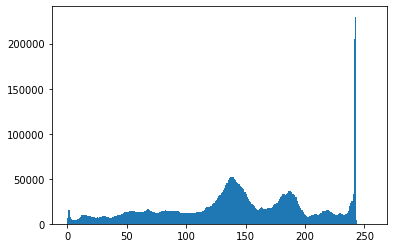

In [25]:
plt.hist(img.ravel(),256,[0,256]);
plt.show()

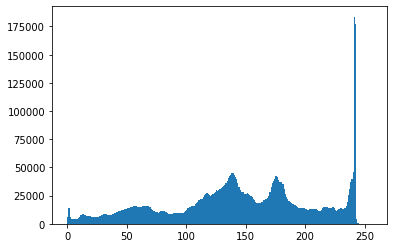

In [26]:
plt.hist(img2.ravel(),256,[0,256])
plt.show()

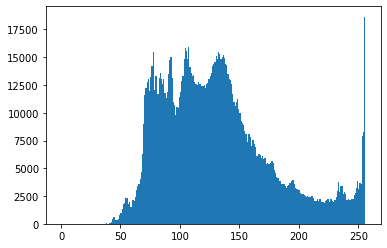

In [27]:
plt.hist(img3.ravel(),256,[0,256])
plt.show()

In [29]:
glcm= greycomatrix(img,[1],[0],symmetric = True,normed = True)
glcm2 = greycomatrix(img2,[1],[0],symmetric = True,normed = True)
glcm3 = greycomatrix(img3,[1],[0],symmetric = True,normed = True)

In [30]:
np.sum((glcm - glcm2)**2)**0.5

0.014879833860659279

In [31]:
np.sum((glcm2 - glcm3)**2)**0.5

0.056278304324028895

In [32]:
np.sum((glcm - glcm3)**2)**0.5

0.06663271778663998

In [76]:
def CombineSimilarity(img,img2):
    hist = cv2.calcHist([img],[0],None,[256],[0,256])
    hist2 = [ cv2.calcHist([x],[0],None,[256],[0,256]) for x in img2 ]
    hist = cv2.normalize(hist,hist).flatten()
    hist2 = [ cv2.normalize(x,x).flatten() for x in hist2]
    HisSimilarity = np.array([ cv2.compareHist(hist,x,cv2.HISTCMP_INTERSECT) for x in hist2])
    
    glcm= greycomatrix(cv2.cvtColor(img,cv2.COLOR_RGB2GRAY),[1],[0],symmetric = True,normed = True)
    glcm2 = [ greycomatrix(cv2.cvtColor(x,cv2.COLOR_RGB2GRAY),[1],[0],symmetric = True,normed = True) for x in img2]
    GLCMSimilarity = np.sum((glcm - glcm2)**2)**0.5
    return 0.7*HisSimilarity + 0.3*GLCMSimilarity
    

In [37]:
def CombineSimilarity_single(img,img2):
    hist = cv2.calcHist([img],[0],None,[256],[0,256])
    hist2 = cv2.calcHist([img2],[0],None,[256],[0,256])
    hist = cv2.normalize(hist,hist).flatten()
    hist2 = cv2.normalize(hist2,hist2).flatten()
    HisSimilarity = cv2.compareHist(hist,hist2,cv2.HISTCMP_INTERSECT)
    print(HisSimilarity)
    
    glcm= greycomatrix(img,[1],[0],symmetric = True,normed = True)
    glcm2 = greycomatrix(img2,[1],[0],symmetric = True,normed = True)
    GLCMSimilarity = np.sum((glcm - glcm2)**2)**0.5
    print(GLCMSimilarity)
    return 0.7*HisSimilarity + 0.3*GLCMSimilarity

In [38]:
CombineSimilarity_single(img,img2)

9.679427562602768
0.014879833860659279


6.780063243980135

In [39]:
CombineSimilarity_single(img,img3)

7.18405067097865
0.06663271778663998


5.048825285021047

In [40]:
CombineSimilarity_single(img,img)

10.504233768672748
0.0


7.352963638070923

# video clustering

In [73]:
vidcap = cv2.VideoCapture("./test_video.mp4")

test_image_set = []
count = 0

while(vidcap.isOpened):
    ret, image = vidcap.read()
    print(ret)
    if ret:
        test_image_set.append(image)
        count +=1
        print(f"frame {count}")
    else:
            break
vidcap.release()

True
frame 1
True
frame 2
True
frame 3
True
frame 4
True
frame 5
True
frame 6
True
frame 7
True
frame 8
True
frame 9
True
frame 10
True
frame 11
True
frame 12
True
frame 13
True
frame 14
True
frame 15
True
frame 16
True
frame 17
True
frame 18
True
frame 19
True
frame 20
True
frame 21
True
frame 22
True
frame 23
True
frame 24
True
frame 25
True
frame 26
True
frame 27
True
frame 28
True
frame 29
True
frame 30
True
frame 31
True
frame 32
True
frame 33
True
frame 34
True
frame 35
True
frame 36
True
frame 37
True
frame 38
True
frame 39
True
frame 40
True
frame 41
True
frame 42
True
frame 43
True
frame 44
True
frame 45
True
frame 46
True
frame 47
True
frame 48
True
frame 49
True
frame 50
True
frame 51
True
frame 52
True
frame 53
True
frame 54
True
frame 55
True
frame 56
True
frame 57
True
frame 58
True
frame 59
True
frame 60
True
frame 61
True
frame 62
True
frame 63
True
frame 64
True
frame 65
True
frame 66
True
frame 67
True
frame 68
True
frame 69
True
frame 70
True
frame 71
True
frame 72
T

In [86]:
class Clustering:
    def __init__(self,train_x):
        self.numCluster = 1
        self.Cluster = []
        self.centroid = []
        self.a = 6.0
        self.learn(train_x)
    def learn(self,train_x):
        self.Cluster.append([train_x[0]])
        self.centroid.append(train_x[0])
        for idx,x in enumerate(train_x[1:]):
            s = np.max(CombineSimilarity(x,self.centroid))
            idx = np.argmax(CombineSimilarity(x,self.centroid))
            print(f'{s} ')
            if(s > self.a):
                print(f'Cluster idx : {idx}')
                self.Cluster[idx].append(x)
                numFrame = len(self.Cluster[idx])
                self.centroid[idx] = self.Cluster[idx][numFrame//2]
            else:
                print(f'Cluster idx : {self.numCluster-1}')
                self.Cluster.append([x])
                self.numCluster+=1
                self.centroid.append(x)
                
            
                
            

In [87]:
cl = Clustering(test_image_set)

6.085602640317657 
Cluster idx : 0
6.0441809142273515 
Cluster idx : 0
5.957336302236141 
Cluster idx : 0
5.906695107840596 
Cluster idx : 1
5.8329191233583355 
Cluster idx : 2
5.793784459859133 
Cluster idx : 3
5.771373452755791 
Cluster idx : 4
5.763160824500743 
Cluster idx : 5
5.6942561750871326 
Cluster idx : 6
5.691247236782402 
Cluster idx : 7
5.689402582438278 
Cluster idx : 8
5.651079851597617 
Cluster idx : 9
5.61040851024561 
Cluster idx : 10
5.603860211796019 
Cluster idx : 11
5.582412768303508 
Cluster idx : 12
5.5668562738246825 
Cluster idx : 13
5.549343228783798 
Cluster idx : 14
5.5254099231788585 
Cluster idx : 15
5.504090124079594 
Cluster idx : 16
5.452523997161266 
Cluster idx : 17
5.399437234077179 
Cluster idx : 18
5.414820676641307 
Cluster idx : 19
5.389840290065002 
Cluster idx : 20
5.400699298526131 
Cluster idx : 21
5.368939563930726 
Cluster idx : 22
5.407052603975776 
Cluster idx : 23
5.428049034829387 
Cluster idx : 24
5.437159796157622 
Cluster idx : 25


In [88]:
count = 0
for i in range(len(cl.centroid)):
    if len(cl.Cluster[i]) >= len(test_image_set)*0.1:
        print(i)
        cv2.imwrite('test_image_' + str(count) + '.jpg',cl.centroid[i])
        count += 1

47
48
